In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import emoji
%matplotlib inline 

#importing rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Descriptors
from rdkit import RDConfig
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
#from utility import FeatureGenerator
from rdkit.Chem import PandasTools as PandasTools
from rdkit import DataStructs
from rdkit.Chem.Subshape import SubshapeBuilder,SubshapeAligner,SubshapeObjects

#importing sklearn 
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
import pandas as pd
from mordred import Calculator, descriptors
import wget
import unzip
import padelpy

In [2]:
from rdkit.Chem import AllChem
from rdkit import Chem
import pandas as pd

sol = pd.read_csv('D:/python/rdkit/new222new.csv')
print(sol.head)
XY = sol.set_index('SMILES').T.to_dict('list')

<bound method NDFrame.head of                                                  SMILES  \
0               OCC1OC(CO)(OC2OC(CO)C(O)C(O)C2O)C(O)C1O   
1     O[C@H]1[C@H](O[C@H](CO)[C@@H](O)[C@@H]1O)O[C@]...   
2     OC[C@@H]1O[C@](CO)(O[C@@H]2O[C@@H](CO)[C@H](O)...   
3                CN1C[C@@H]2C[C@@H](C1)C3=CC=CC(=O)N3C2   
4                          CN1CC2CC(C1)C1=CC=CC(=O)N1C2   
...                                                 ...   
8433                                      O=[N+]([O-])C   
8434                                                 OC   
8435                                            S=C(N)N   
8436                                           O=C(NO)N   
8437                                            O=C(N)N   

      measured log(solubility:mol/L)  
0                               0.79  
1                               0.79  
2                               0.79  
3                               0.65  
4                               0.65  
...                        

In [3]:
Y = sol.iloc[:,1]
Y

0       0.79
1       0.79
2       0.79
3       0.65
4       0.65
        ... 
8433    0.26
8434    1.57
8435    0.32
8436    1.12
8437    0.96
Name: measured log(solubility:mol/L), Length: 8438, dtype: float64

In [4]:
#descriptor
molecules = sol.SMILES.apply(Chem.MolFromSmiles)

In [5]:
def All_Mordred_descriptors(data):
    calc = Calculator(descriptors, ignore_3D=True)
    mols = [Chem.MolFromSmiles(smi) for smi in data]
    
    # pandas df
    df = calc.pandas(mols)
    return df

In [ ]:
mordred_descriptors = All_Mordred_descriptors(sol['SMILES'])

  0%|                                                                                         | 0/8438 [00:00<?, ?it/s]

In [61]:
mordred_descriptors.shape

(8438, 1613)

In [62]:
X=mordred_descriptors 

In [535]:
X.to_excel(r'D:/python/rdkit/experiments.xlsx', index = False)

In [63]:
from sklearn.feature_selection import VarianceThreshold

vt = VarianceThreshold()

In [64]:
des_num = X.select_dtypes(include='number')
des_num.shape

(8438, 811)

In [65]:
transformed = vt.fit_transform(des_num)


In [66]:
_ = vt.fit(des_num)

mask = vt.get_support()


In [67]:
des_num = des_num.loc[:, mask]


In [68]:
vt = VarianceThreshold(threshold=0.1)

# Fit
_ = vt.fit(des_num)

# Get the boolean mask
mask = vt.get_support()

des_reduced = des_num.loc[:, mask]
H=des_reduced
#X=H.drop(['FilterItLogS', 'SLogP'], axis=1)
X=H
X.shape

(8438, 506)

In [69]:
correlated_features = set()
correlation_matrix=X.corr()

In [70]:
for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [71]:
len(correlated_features)

328

In [30]:
print(correlated_features)

{'ATS2se', 'MPC6', 'TopoPSA(NO)', 'ATS3d', 'nBondsKS', 'AATS1i', 'ATS5i', 'ATSC2are', 'IC3', 'AMW', 'SRW10', 'bpol', 'MWC02', 'ATSC2pe', 'SssNH', 'ATSC0pe', 'Xp-2d', 'fragCpx', 'AATS0m', 'C2SP2', 'ATSC2p', 'SlogP_VSA6', 'SLogP', 'ATS8d', 'ATS1m', 'ATSC4pe', 'ATS2Z', 'ATS0are', 'nBondsA', 'VSA_EState6', 'nRing', 'Sse', 'SsOH', 'SlogP_VSA5', 'ATSC0m', 'ZMIC2', 'MWC05', 'AATS0p', 'ATS0pe', 'EState_VSA9', 'ATS6se', 'AATS1dv', 'SMR', 'MPC10', 'Xp-7d', 'ATS8i', 'piPC3', 'ATS1Z', 'MWC10', 'ATS5Z', 'TIC1', 'IC4', 'ATSC0se', 'ATS0se', 'Xpc-6d', 'AATS1d', 'ATSC8m', 'MPC9', 'MIC5', 'n6aRing', 'ATS2are', 'ATS8p', 'ATS1dv', 'ATS7Z', 'ATS6p', 'ATSC1are', 'Radius', 'ATSC4m', 'ATS6m', 'NdO', 'ATS3p', 'MIC0', 'ATS5se', 'ATS1are', 'ATS2i', 'ATSC6p', 'Xp-3dv', 'ZMIC5', 'MWC07', 'AATS1v', 'ATS3m', 'SMR_VSA2', 'ATS3pe', 'ATS4are', 'ATSC8are', 'Xp-2dv', 'Zagreb1', 'TSRW10', 'ATS0m', 'SZ', 'SRW06', 'GGI3', 'Si', 'GGI2', 'Zagreb2', 'LabuteASA', 'CIC2', 'nBondsKD', 'ATS4d', 'Xpc-5d', 'ATS6i', 'Xp-4d', 'ATS5d',

In [72]:
X.drop(labels=correlated_features, axis=1, inplace=True)

C:\Users\DEDP Grader\AppData\Local\Temp\ipykernel_10204\1003493426.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(labels=correlated_features, axis=1, inplace=True)


In [89]:
X.shape

(8438, 178)

In [51]:
X.head()

,ABC,ABCGG,nAcid,nBase,nAromAtom,nAromBond,nAtom,nHeavyAtom,nBridgehead,nHetero,...,SRW09,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb2
0,17.213262,16.059815,0,0,0,0,45,23,0,11,...,7.195187,10.247042,72.317821,342.116212,7.602582,1110,43,120.0,147.0,5.291667
1,17.213262,16.059815,0,0,0,0,45,23,0,11,...,7.195187,10.247042,72.317821,342.116212,7.602582,1110,43,120.0,147.0,5.291667
2,17.213262,16.059815,0,0,0,0,45,23,0,11,...,7.195187,10.247042,72.317821,342.116212,7.602582,1110,43,120.0,147.0,5.291667
3,12.118275,9.747154,0,1,6,6,31,15,2,3,...,0.000000,9.877913,47.958460,204.126263,6.584718,322,25,84.0,101.0,3.166667
4,12.118275,9.747154,0,1,6,6,31,15,2,3,...,0.000000,9.877913,47.958460,204.126263,6.584718,322,25,84.0,101.0,3.166667


In [83]:
gf=set()

In [84]:
i=0
for i in range(len(X.columns)):
   
    colname = X.columns[i]
    gf.add(colname)

In [85]:
gf


{'AATS0d',
 'AATS0dv',
 'AATS0i',
 'AATSC0dv',
 'AATSC0i',
 'AATSC0v',
 'AATSC1Z',
 'ABC',
 'ATS0Z',
 'ATSC0i',
 'ATSC1Z',
 'ATSC1d',
 'ATSC1dv',
 'ATSC1i',
 'ATSC1p',
 'ATSC1se',
 'ATSC1v',
 'ATSC2Z',
 'ATSC2d',
 'ATSC2dv',
 'ATSC2i',
 'ATSC2se',
 'ATSC2v',
 'ATSC3Z',
 'ATSC3d',
 'ATSC3dv',
 'ATSC3i',
 'ATSC3p',
 'ATSC3se',
 'ATSC3v',
 'ATSC4Z',
 'ATSC4d',
 'ATSC4dv',
 'ATSC4i',
 'ATSC4p',
 'ATSC4se',
 'ATSC4v',
 'ATSC5Z',
 'ATSC5d',
 'ATSC5dv',
 'ATSC5i',
 'ATSC5p',
 'ATSC5se',
 'ATSC5v',
 'ATSC6Z',
 'ATSC6d',
 'ATSC6dv',
 'ATSC6i',
 'ATSC6se',
 'ATSC6v',
 'ATSC7Z',
 'ATSC7d',
 'ATSC7dv',
 'ATSC7i',
 'ATSC7p',
 'ATSC7v',
 'ATSC8Z',
 'ATSC8d',
 'ATSC8dv',
 'ATSC8i',
 'ATSC8v',
 'BalabanJ',
 'C1SP2',
 'C1SP3',
 'C2SP3',
 'C3SP2',
 'C3SP3',
 'CIC1',
 'Diameter',
 'ECIndex',
 'EState_VSA1',
 'EState_VSA2',
 'EState_VSA3',
 'EState_VSA4',
 'EState_VSA5',
 'EState_VSA6',
 'EState_VSA7',
 'EState_VSA8',
 'FilterItLogS',
 'GATS1i',
 'GATS1p',
 'IC1',
 'NaaN',
 'NaaNH',
 'NaaaC',
 'NaasC',
 '

In [41]:
X.to_excel(r'D:/python/rdkit/file name descriptor 8000data.xlsx', index = False)

In [8]:
Y = sol.iloc[:,1]
Y

0      1380d
1        807
2       561d
3      222-1
4        650
5       1143
6     1750d2
7       1171
8      1873d
9        294
10       114
11       591
12       294
Name: Unnamed: 1, dtype: object

In [75]:
#data split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=991)
#test size is 20% and traing size is 80%
#linear regression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [76]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, Y_train)

RandomForestRegressor(random_state=42)

In [94]:
linearmodel=linear_model.LinearRegression()
linearmodel.fit(X_train, Y_train)

LinearRegression()

In [97]:
#predicts the X_train
Y_pred_train = linearmodel.predict(X_train)
#print('Coefficients:', model.coef_)
#print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_train, Y_pred_train,squared=False))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_train, Y_pred_train))

Mean squared error (MSE): 0.82
Coefficient of determination (R^2): 0.80


In [98]:
#predicts the X_test
Y_pred_test = linearmodel.predict(X_test)
#print('Coefficients:', model.coef_)44444444444
#print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, Y_pred_test,squared=False))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_pred_test))

Mean squared error (MSE): 0.83
Coefficient of determination (R^2): 0.81


In [95]:
#predicts the X_train
Y_pred_train = model.predict(X_train)
#print('Coefficients:', model.coef_)
#print('Intercept:', model.intercept_)
print('Mean squared error (RMSE): %.2f'
      % mean_squared_error(Y_train, Y_pred_train,squared=False))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_train, Y_pred_train))



Mean squared error (RMSE): 0.26
Coefficient of determination (R^2): 0.98


In [96]:
#predicts the X_test
Y_pred_test = model.predict(X_test)
#print('Coefficients:', model.coef_)44444444444
#print('Intercept:', model.intercept_)
print('Mean squared error (RMSE): %.2f'
      % mean_squared_error(Y_test, Y_pred_test,squared=False))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_pred_test))

Mean squared error (RMSE): 0.66
Coefficient of determination (R^2): 0.88


In [90]:
import shap
from sklearn.preprocessing import StandardScaler
import os
import sys
#import Explanation

C:\Users\DEDP Grader\anaconda3\envs\rdkit\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [91]:

explainer = shap.Explainer(model)
shap_values = explainer(X_test)

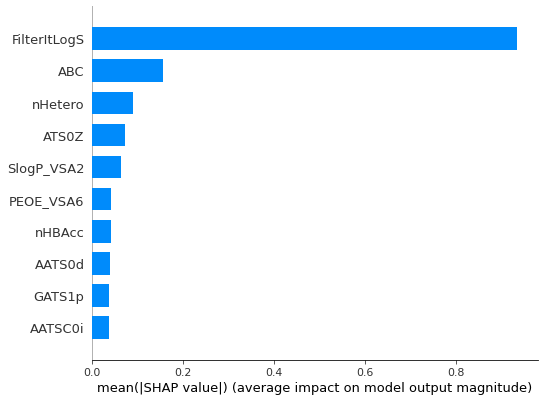

In [101]:
shap.summary_plot(shap_values, X_test, plot_type="bar",show=False,max_display=10,plot_size=0.5)

#plot_size=(18.0, 10.0)
plt.savefig('most effective descriptor for des approch with SLOGP.pdf',bbox_inches='tight',dpi = 1000)

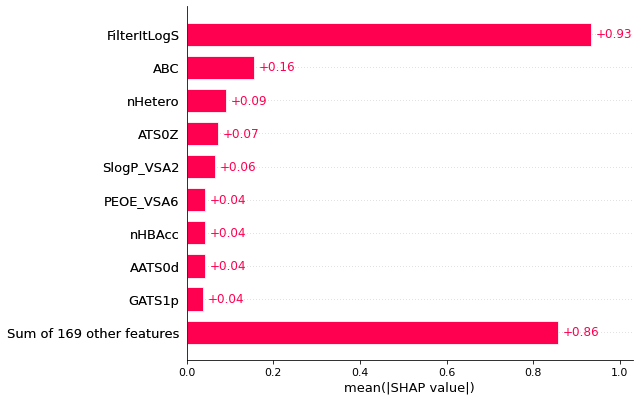

In [102]:
shap.plots.bar(shap_values, max_display=10,show=False)
plt.savefig('scratcch.pdf',bbox_inches='tight',dpi = 1000)

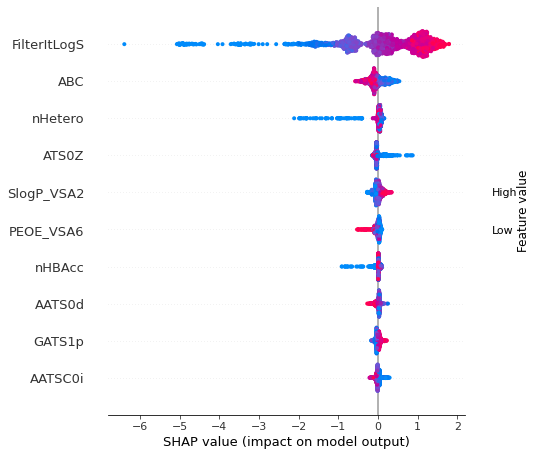

In [103]:
shap.summary_plot(shap_values, plot_type="dot", plot_size=0.6, show=False,max_display=10)
plt.savefig('scratcch.pdf',bbox_inches='tight',dpi = 1000)

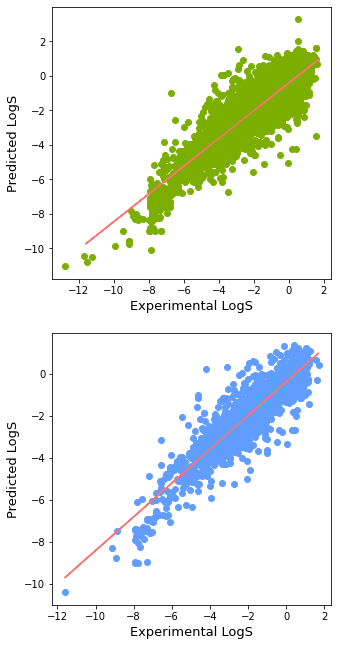

In [99]:
#Vertical plot
plt.figure(figsize=(5,11))

# 2 row, 1 column, plot 1
plt.subplot(2, 1, 1)
plt.scatter(x=Y_train, y=Y_pred_train, c="#7CAE00", alpha=1)

# Add trendline
# https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs
z = np.polyfit(Y_train, Y_pred_train, 1)
p = np.poly1d(z)
plt.plot(Y_test,p(Y_test),"#F8766D")


plt.xlabel('Experimental LogS', fontsize=13)
plt.ylabel('Predicted LogS', fontsize=13)


# 2 row, 1 column, plot 2
plt.subplot(2, 1, 2)
plt.scatter(x=Y_test, y=Y_pred_test, c="#619CFF", alpha=1)

z = np.polyfit(Y_test, Y_pred_test, 1)
p = np.poly1d(z)
plt.plot(Y_test,p(Y_test),"#F8766D")

plt.ylabel('Predicted LogS', fontsize=13)
plt.xlabel('Experimental LogS', fontsize=13)

plt.savefig('plot_vertical_logS.png')
plt.savefig('paper logS descriptor.pdf',dpi=1200)
plt.show()

In [79]:
testdata = pd.read_csv('D:/python/rdkit/testexperiment2upload2raw.csv')
testdata

,Substance,SMILES
0,hexobarbital,CN1C(=O)NC(=O)C(C)(C1=O)C1=CCCCC1
1,nalidixic_acid,CCn1cc(c(=O)c2ccc(nc12)C)C(=O)O
2,phenantroline,c12c(ccc3cccnc13)cccn2
3,phenobarbital,C1(NC(C(c2ccccc2)(C(=O)N1)CC)=O)=O
4,sulfamethazine,S(=O)(=O)(Nc1nc(C)cc(n1)C)c1ccc(N)cc1
5,bromogramine,Brc1cc2c(CN(C)C)c[nH]c2cc1
6,phenazopyridine,c1ccc(cc1)\N=N\c1c(nc(cc1)N)N
7,amantadine,C1C2CC3CC(CC1C3)(N)C2
8,benzylimidazole,n1(Cc2ccccc2)cncc1
9,chlorpropamide,Clc1ccc(S(=O)(NC(=O)NCCC)=O)cc1


In [80]:
def All_Mordred_descriptors(data):
    calc = Calculator(descriptors, ignore_3D=True)
    mols = [Chem.MolFromSmiles(smi) for smi in data]
    
    # pandas df
    df = calc.pandas(mols)
    return df

In [81]:
mordred_descriptors2 = All_Mordred_descriptors(testdata['SMILES'])

100%|██████████████████████████████████████████████████████████████████████████████████| 35/35 [00:03<00:00, 10.98it/s]


In [86]:
Xnew=mordred_descriptors2[['AATS0d',
 'AATS0dv',
 'AATS0i',
 'AATSC0dv',
 'AATSC0i',
 'AATSC0v',
 'AATSC1Z',
 'ABC',
 'ATS0Z',
 'ATSC0i',
 'ATSC1Z',
 'ATSC1d',
 'ATSC1dv',
 'ATSC1i',
 'ATSC1p',
 'ATSC1se',
 'ATSC1v',
 'ATSC2Z',
 'ATSC2d',
 'ATSC2dv',
 'ATSC2i',
 'ATSC2se',
 'ATSC2v',
 'ATSC3Z',
 'ATSC3d',
 'ATSC3dv',
 'ATSC3i',
 'ATSC3p',
 'ATSC3se',
 'ATSC3v',
 'ATSC4Z',
 'ATSC4d',
 'ATSC4dv',
 'ATSC4i',
 'ATSC4p',
 'ATSC4se',
 'ATSC4v',
 'ATSC5Z',
 'ATSC5d',
 'ATSC5dv',
 'ATSC5i',
 'ATSC5p',
 'ATSC5se',
 'ATSC5v',
 'ATSC6Z',
 'ATSC6d',
 'ATSC6dv',
 'ATSC6i',
 'ATSC6se',
 'ATSC6v',
 'ATSC7Z',
 'ATSC7d',
 'ATSC7dv',
 'ATSC7i',
 'ATSC7p',
 'ATSC7v',
 'ATSC8Z',
 'ATSC8d',
 'ATSC8dv',
 'ATSC8i',
 'ATSC8v',
 'BalabanJ',
 'C1SP2',
 'C1SP3',
 'C2SP3',
 'C3SP2',
 'C3SP3',
 'CIC1',
 'Diameter',
 'ECIndex',
 'EState_VSA1',
 'EState_VSA2',
 'EState_VSA3',
 'EState_VSA4',
 'EState_VSA5',
 'EState_VSA6',
 'EState_VSA7',
 'EState_VSA8',
 'FilterItLogS',
 'GATS1i',
 'GATS1p',
 'IC1',
 'NaaN',
 'NaaNH',
 'NaaaC',
 'NaasC',
 'NaasN',
 'NddsN',
 'NddssS',
 'NdsCH',
 'NdssC',
 'NsCH3',
 'NsNH2',
 'NsOH',
 'NssCH2',
 'NssNH',
 'NssO',
 'NsssCH',
 'NsssN',
 'NssssC',
 'PEOE_VSA1',
 'PEOE_VSA10',
 'PEOE_VSA11',
 'PEOE_VSA12',
 'PEOE_VSA13',
 'PEOE_VSA2',
 'PEOE_VSA3',
 'PEOE_VSA4',
 'PEOE_VSA5',
 'PEOE_VSA6',
 'PEOE_VSA7',
 'PEOE_VSA8',
 'PEOE_VSA9',
 'SMR_VSA4',
 'SMR_VSA6',
 'SMR_VSA9',
 'SaaO',
 'SaasC',
 'SdCH2',
 'SdNH',
 'SdS',
 'SdsN',
 'SdssC',
 'SdsssP',
 'SlogP_VSA1',
 'SlogP_VSA10',
 'SlogP_VSA11',
 'SlogP_VSA2',
 'SlogP_VSA3',
 'SlogP_VSA4',
 'SlogP_VSA7',
 'SsI',
 'SsSH',
 'SssS',
 'SsssCH',
 'StCH',
 'StN',
 'StsC',
 'VSA_EState1',
 'VSA_EState2',
 'VSA_EState4',
 'VSA_EState7',
 'VSA_EState8',
 'VSA_EState9',
 'WPath',
 'Xc-3dv',
 'Xc-5d',
 'Xc-5dv',
 'Xch-7d',
 'n5ARing',
 'n5HRing',
 'n5Ring',
 'n5aRing',
 'n6ARing',
 'n6HRing',
 'nAHRing',
 'nARing',
 'nAcid',
 'nAromAtom',
 'nAtom',
 'nBase',
 'nBondsD',
 'nBr',
 'nBridgehead',
 'nC',
 'nCl',
 'nF',
 'nFRing',
 'nHBAcc',
 'nHBDon',
 'nHRing',
 'nHetero',
 'nN',
 'nO',
 'nRot',
 'nS',
 'nX',
 'naHRing']]
Xnew.shape


(35, 178)

In [87]:

# make a prediction
#Xnew=mordred_descriptors
ynew = model.predict(Xnew)
#print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))
ynew

C:\Users\DEDP Grader\anaconda3\envs\rdkit\lib\site-packages\sklearn\base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


array([-1.8095    , -1.61493889, -1.96435972, -1.93680833, -2.0154    ,
       -1.84255   , -1.81003333, -1.67927083, -1.92460847, -1.90865   ,
       -0.67946958, -2.13519722, -1.95239722, -1.43358889, -2.1993    ,
       -1.6482    , -2.0466964 , -2.06585   , -2.0925    , -1.8042375 ,
       -2.18155   , -1.5483    , -1.7451475 , -1.8514375 , -1.94165   ,
       -1.5168125 , -2.06953889, -1.3155125 , -2.09739306, -2.28665   ,
       -2.0466    , -1.48947097, -1.7551675 , -2.1285    , -1.90877917])

In [88]:
from numpy import asarray
from numpy import savetxt
# define data
data = asarray(ynew)
# save to csv file
savetxt('datagg.csv', data, delimiter=',')